<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: программист-исследователь Mail.ru Group  Юрий Кашницкий

Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 4. <br> Логистическая регрессия, метод ближайших соседей и дерево решений на наборе данных UCI Adult

**Заполните код в клетках и выберите ответы в [веб-форме](https://goo.gl/forms/JNXoYIivcH81tXEq1).**

In [70]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# pip install tqdm – замер времени выполнения итераций цикла
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Часть 1. Визуальный анализ данных

**Считаем [данные](https://archive.ics.uci.edu/ml/datasets/Adult) по жителям США из репозитория UCI. По ссылке можно почитать про данные и смысл признаков.**

In [71]:
adult = pd.read_csv('../../data/adult.data.csv')

In [72]:
adult.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Поисследуйте данные – постройте гистораммы, диаграммы рассеяния с помощью seaborn, посмотрите, как целевой признак salary зависит от других. Используйте методы distplot, pairplot, countplot, boxplot из seaborn (может, и другие). Эта часть задания строго не формулируется.**

In [73]:
''' ВАШ КОД ЗДЕСЬ '''

' ВАШ КОД ЗДЕСЬ '

## Часть 2. Подготовка данных

**Выделите целевой признак *y*, равный 1, если зарплата > 50K ($50 тыс. в год) и 0 – иначе.**

In [74]:
adult['test'] = 1
adult.head()

adult['is_salary>50K'] = pd.get_dummies(adult[adult['salary']==">50K"]['test'])
adult['is_salary>50K'].fillna(0, inplace=True)
y = adult['is_salary>50K']

adult.head(10).T
print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       0.0
13       0.0
14       1.0
15       0.0
16       0.0
17       0.0
18       0.0
19       1.0
20       1.0
21       0.0
22       0.0
23       0.0
24       0.0
25       1.0
26       0.0
27       1.0
28       0.0
29       0.0
        ... 
32531    0.0
32532    1.0
32533    1.0
32534    0.0
32535    0.0
32536    1.0
32537    0.0
32538    1.0
32539    1.0
32540    0.0
32541    0.0
32542    0.0
32543    0.0
32544    0.0
32545    1.0
32546    0.0
32547    0.0
32548    0.0
32549    0.0
32550    0.0
32551    0.0
32552    0.0
32553    0.0
32554    1.0
32555    0.0
32556    0.0
32557    1.0
32558    0.0
32559    0.0
32560    1.0
Name: is_salary>50K, Length: 32561, dtype: float64


**Составьте DataFrame *X* из количественных признаков – *age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week*.**

In [75]:
X = adult.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country', 'test', 'salary', 'is_salary>50K'], axis=1)
X.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
5,37,284582,14,0,0,40
6,49,160187,5,0,0,16
7,52,209642,9,0,0,45
8,31,45781,14,14084,0,50
9,42,159449,13,5178,0,40


**Разбейте *X* и *y* на обучающую и проверочную части в отношении 7:3 с помощью метода *train_test_split* из *sklearn.model_selection*. Поскольку разбиение случайно, зафиксируйте параметр *random_state=17* – для воспроизводимости результатов. При необходимости посмотрите встроенную документацию метода.**

In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
10626,30,78980,11,0,0,40
24350,43,247162,12,0,0,40
11454,25,247006,12,0,0,45
6562,44,138845,10,0,0,40
31618,42,24982,10,7688,0,40
24022,24,149342,13,0,0,40
5194,38,225707,9,0,0,40
9783,39,179481,9,4650,0,44
32157,45,49595,10,0,0,80
5173,37,305379,13,0,0,50


**Метрические (ex. kNN) и линейные методы (ex. logit) классификации и регрессии чувствительны к диапазону изменения значений признаков и работают лучше, если отмасштабировать признаки – для каждого признака вычесть среднее значение признака и поделить на стандартное отклонение. Это делает класс *StandartScaler* из *sklearn.preprocessing*.**

In [77]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_train_scaled

array([[-0.62971007, -1.05355843,  0.35964522, -0.14505735, -0.21604326,
        -0.03567532],
       [ 0.32344253,  0.54633385,  0.74840661, -0.14505735, -0.21604326,
        -0.03567532],
       [-0.99630723,  0.54484984,  0.74840661, -0.14505735, -0.21604326,
         0.36665618],
       ..., 
       [-1.21626553,  1.57870776, -0.02911617, -0.14505735, -0.21604326,
        -0.03567532],
       [ 0.2501231 , -0.60042273,  1.137168  , -0.14505735, -0.21604326,
        -0.84033833],
       [-1.14294609, -0.61605236, -0.02911617, -0.14505735, -0.21604326,
        -0.03567532]])

## Часть 3. Обучение моделей с параметрами по умолчанию

**Обучите логистическую регрессию с настройками по умолчанию (единственное, укажите *random_state=17*) на тренировочной части выборки *(X_train_scaled, y_train)*, сделайте прогнозы для проверочной части *(X_valid_scaled, y_valid)*, посчитайте долю правильных ответов (*accuracy_score* из *sklearn.metrics* или метод *score* у обученной модели) на обеих выборках.**

In [78]:
logit = LogisticRegression(random_state=17)
logit.fit(X_train_scaled, y_train)
y_predicted = logit.predict(X_valid_scaled)

score_train = logit.score(X_train_scaled, y_train)
score_valid = logit.score(X_valid_scaled, y_valid)
score_train, score_valid

# from sklearn.metrics import accuracy_score
# score = accuracy_score(y_valid, y_predicted)
# score

#Ответ 1: 0.816 и 0.816

(0.81554931554931553, 0.81605077285290206)

**<font color='red'>Вопрос 1.</font> Каковы доли правильных ответов логистической регрессии на выборках *(X_train_scaled, y_train)* и *(X_valid_scaled, y_valid)*?**

**Обучите метод ближайших соседей с настройками по умолчанию на тренировочной части выборки *(X_train_scaled, y_train)*, сделайте прогнозы для проверочной части *(X_valid_scaled, y_valid)*, посчитайте долю правильных ответов (*accuracy_score* из *sklearn.metrics* или метод *score* у обученной модели) на обеих выборках.**

In [79]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_predicted1 = knn.predict(X_valid_scaled)

score_train1 = knn.score(X_train_scaled, y_train)
score_valid1 = knn.score(X_valid_scaled, y_valid)
score_train1, score_valid1

#Ответ 2: 0.857 и 0.802

(0.8574499824499825, 0.80192445490838371)

**<font color='red'>Вопрос 2.</font> Каковы доли правильных ответов метода ближайших соседей на выборках *(X_train_scaled, y_train)* и *(X_valid_scaled, y_valid)*?**

**Обучите дерево решений с настройками по умолчанию (только опять *random_state=17*) на тренировочной части выборки *(X_train, y_train)*, сделайте прогнозы для проверочной части *(X_valid, y_valid)*, посчитайте долю правильных ответов (*accuracy_score* из *sklearn.metrics* или метод *score* у обученной модели) на обеих выборках.**

In [84]:
clf = DecisionTreeClassifier(random_state=17)
clf.fit(X_train, y_train)
y_train_predicted = clf.predict(X_train)
y_valid_predicted = clf.predict(X_valid)

score_train2 = clf.score(X_train, y_train)
score_valid2 = clf.score(X_valid, y_valid)
score_train2, score_valid2

# from sklearn.metrics import accuracy_score
# score_train21 = accuracy_score(y_train, y_train_predicted)
# score_valid21 = accuracy_score(y_valid, y_valid_predicted)
# score_train21, score_valid21

#Ответ 3: вероятно 1 и 0.773. Откуда неточность?
#Ответ 4: дерево решений переобучилось

(0.99938574938574942, 0.77244344354591055)

**<font color='red'>Вопрос 3.</font> Каковы доли правильных ответов дерева решений на выборках *(X_train_scaled, y_train)* и *(X_valid_scaled, y_valid)*?**

**<font color='red'>Вопрос 4.</font> Почему у дерева решений такая разница между двумя величинами в Вопросе 3?**

## Часть 4. Настройка параметров моделей

**Посмотрите, как качество классификации на обеих выборках зависит у логистической модели от параметра регуляризации *C*. Параметр будем перебирать от 0.001 до 1, 50 значений. Доли правильных ответов на обучающей выборке *(X_train_scaled, y_train)* будем хранить в списке *logit_train_scores*, на проверочной *(X_valid_scaled, y_valid)* – в списке *logit_valid_scores*. Используйте *random_state*=17.**

In [98]:
logit_train_scores, logit_valid_scores = [], []
c_values = np.linspace(1e-3, 1, 50)
for c_val in tqdm(c_values):
    logit = LogisticRegression(C=c_val, random_state=17)
    logit.fit(X_train_scaled, y_train)
    logit_train_scores.append(logit.score(X_train_scaled, y_train))
    logit_valid_scores.append([c_val, logit.score(X_valid_scaled, y_valid)])

from operator import itemgetter
max(logit_valid_scores), max(logit_valid_scores, key=itemgetter(1))[0]

A Jupyter Widget

([1.0, 0.81605077285290206], 0.10293877551020408)

**Нарисуем график, как доли правильных ответов зависят от параметра *C* на обеих выборках.**

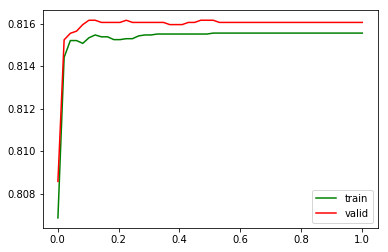

In [91]:
plt.plot(c_values, logit_train_scores, color='green', label='train')
plt.plot(c_values, logit_valid_scores, color='red', label='valid')
plt.legend();

#Ответ 5: 0.816 и 0.103

**<font color='red'>Вопрос 5.</font> Каким получилось лучшее значение доли правильных ответов для логистической регрессии на выборке *(X_valid_scaled, y_valid)*? При каком значении параметра *C* оно достигается?**

**Посмотрите, как качество классификации на обеих выборках зависит у метода ближайших соседей от параметра n_neighbors – числа соседей. Параметр будем перебирать от 5 до 140 с шагом 15. Доли правильных ответов на обучающей выборке *(X_train_scaled, y_train)* будем хранить в списке *knn_train_scores*, на проверочной *(X_valid_scaled, y_valid)* – в списке *knn_valid_scores*.**

In [108]:
knn_train_scores, knn_valid_scores = [], []
n_neighbors = np.arange(5, 145, 15)
for n_neighb in tqdm(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighb)
    knn.fit(X_train_scaled, y_train)
    knn_train_scores.append(knn.score(X_train_scaled, y_train))
    knn_valid_scores.append([n_neighb, knn.score(X_valid_scaled, y_valid)])

A Jupyter Widget

80

In [109]:
max(knn_valid_scores, key=itemgetter(1))[0]
knn_valid_scores

#Ответ 6: 0.826 и 80

[[5, 0.80192445490838371],
 [20, 0.82024772238714305],
 [35, 0.82260210871122941],
 [50, 0.82229501484287026],
 [65, 0.82403521343023856],
 [80, 0.82557068277203394],
 [95, 0.82331866107073393],
 [110, 0.82352339031630672],
 [125, 0.82352339031630672],
 [140, 0.82137373323779306]]

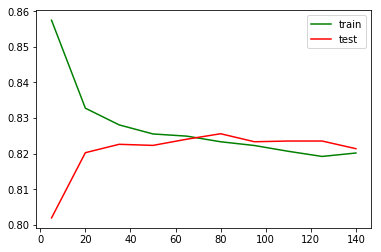

In [101]:
plt.plot(n_neighbors, knn_train_scores, color='green', label='train')
plt.plot(n_neighbors, knn_valid_scores, color='red', label='test')
plt.legend();

**<font color='red'>Вопрос 6.</font> Каким получилось лучшее значение доли правильных ответов для метода ближайших соседей на выборке  *(X_valid_scaled, y_valid)*? При каком значении параметра *n_neighbors* оно достигается?**

**Посмотрите, как качество классификации на обеих выборках зависит у дерева решений от параметра – глубины дерева *max_depth*. Параметр будем перебирать от 2 до 11 –  10 значений. Доли правильных ответов на обучающей выборке *(X_train_scaled, y_train)* будем хранить в списке *tree_train_scores*, на проверочной *(X_valid_scaled, y_valid)* – в списке *tree_valid_scores*. Используйте *random_state*=17.**

In [116]:
tree_train_scores, tree_valid_scores = [], []
depths = np.arange(2,12)
for depth in tqdm(depths):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=17)
    tree.fit(X_train_scaled, y_train)
    tree_train_scores.append(tree.score(X_train_scaled, y_train))
    tree_valid_scores.append([depth, tree.score(X_valid_scaled, y_valid)])

A Jupyter Widget

In [117]:
max(tree_valid_scores)
tree_valid_scores

#Ответ 7: 0.838 и 6

[[2, 0.79957006858429724],
 [3, 0.80980653086293375],
 [4, 0.81686968983519292],
 [5, 0.83447640495444775],
 [6, 0.83764970826082508],
 [7, 0.83611423891902958],
 [8, 0.83191728938478859],
 [9, 0.83447640495444775],
 [10, 0.83201965400757494],
 [11, 0.82997236155184773]]

**Нарисуем график, как доли правильных ответов зависят от параметра *max_depth* на обеих выборках.**

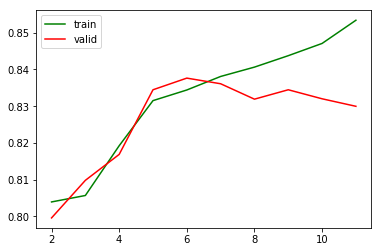

In [112]:
plt.plot(depths, tree_train_scores, color='green', label='train')
plt.plot(depths, tree_valid_scores, color='red', label='valid')
plt.legend();

**<font color='red'>Вопрос 7.</font> Каким получилось лучшее значение доли правильных ответов для дерева решений на выборке  *(X_valid_scaled, y_valid)*? При каком значении параметра *max_depth* оно достигается?**